In [ ]:
import requests

url = "https://yahoo-weather5.p.rapidapi.com/weather"

querystring = {"location":"kansas city","format":"json","u":"f"}

headers = {
	"X-RapidAPI-Key": "865da05788mshbb879fb481a1fc1p1ed8bcjsne9d33117b883",
	"X-RapidAPI-Host": "yahoo-weather5.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'location': {'city': 'Kansas City', 'woeid': 2430683, 'country': 'United States', 'lat': 39.102951, 'long': -94.583061, 'timezone_id': 'America/Chicago'}, 'current_observation': {'pubDate': 1713325440, 'wind': {'chill': 67, 'direction': 'WSW', 'speed': 17}, 'atmosphere': {'humidity': 38, 'visibility': 10, 'pressure': 1001.4}, 'astronomy': {'sunrise': '6:38 AM', 'sunset': '7:59 PM'}, 'condition': {'temperature': 71, 'text': 'Fair'}}, 'forecasts': [{'day': 'Tue', 'date': 1713369600, 'high': 81, 'low': 59, 'text': 'Mostly Sunny', 'code': 34}, {'day': 'Wed', 'date': 1713456000, 'high': 79, 'low': 56, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Thu', 'date': 1713542400, 'high': 77, 'low': 44, 'text': 'Showers', 'code': 11}, {'day': 'Fri', 'date': 1713628800, 'high': 59, 'low': 41, 'text': 'Mostly Cloudy', 'code': 28}, {'day': 'Sat', 'date': 1713715200, 'high': 55, 'low': 41, 'text': 'Cloudy', 'code': 26}, {'day': 'Sun', 'date': 1713801600, 'high': 63, 'low': 43, 'text': 'Mostly Sunny', 

In [8]:
!pip install dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import requests

# Initialize Dash app
app = dash.Dash(__name__)

# Yahoo Weather API endpoint and headers
url = "https://yahoo-weather5.p.rapidapi.com/weather"
headers = {
	"X-RapidAPI-Key": "865da05788mshbb879fb481a1fc1p1ed8bcjsne9d33117b883",
	"X-RapidAPI-Host": "yahoo-weather5.p.rapidapi.com"
}

# Function to get weather data from the API
def get_weather_data(location):
    querystring = {"location": location, "format": "json", "u": "f"}
    response = requests.get(url, headers=headers, params=querystring)
    return response.json()

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Weather Dashboard", style={'text-align': 'center'}),
    html.Div([
        dcc.Input(id='location-input', type='text', value='kansas city', placeholder='Enter location...'),
        html.Button('Submit', id='submit-button', n_clicks=0),
    ]),
    html.Div(id='weather-output')
])

# Callback to fetch and display weather data
@app.callback(
    Output('weather-output', 'children'),
    [Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('location-input', 'value')]
)
def update_weather(n_clicks, location):
    if n_clicks > 0:
        # Get weather data
        weather_data = get_weather_data(location)

        # Extract relevant information
        current_weather = weather_data.get('current_observation', {})
        temperature = current_weather.get('condition', {}).get('temperature', 'N/A')
        text = current_weather.get('condition', {}).get('text', 'N/A')
        humidity = current_weather.get('atmosphere', {}).get('humidity', 'N/A')

        # Create weather report
        weather_report = html.Div([
            html.H3(f"Current Weather in {location}:"),
            html.P(f"Temperature: {temperature} °F"),
            html.P(f"Condition: {text}"),
            html.P(f"Humidity: {humidity}%")
        ])

        return weather_report
    else:
        return html.Div()

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Out put of 3 locations

kansas city
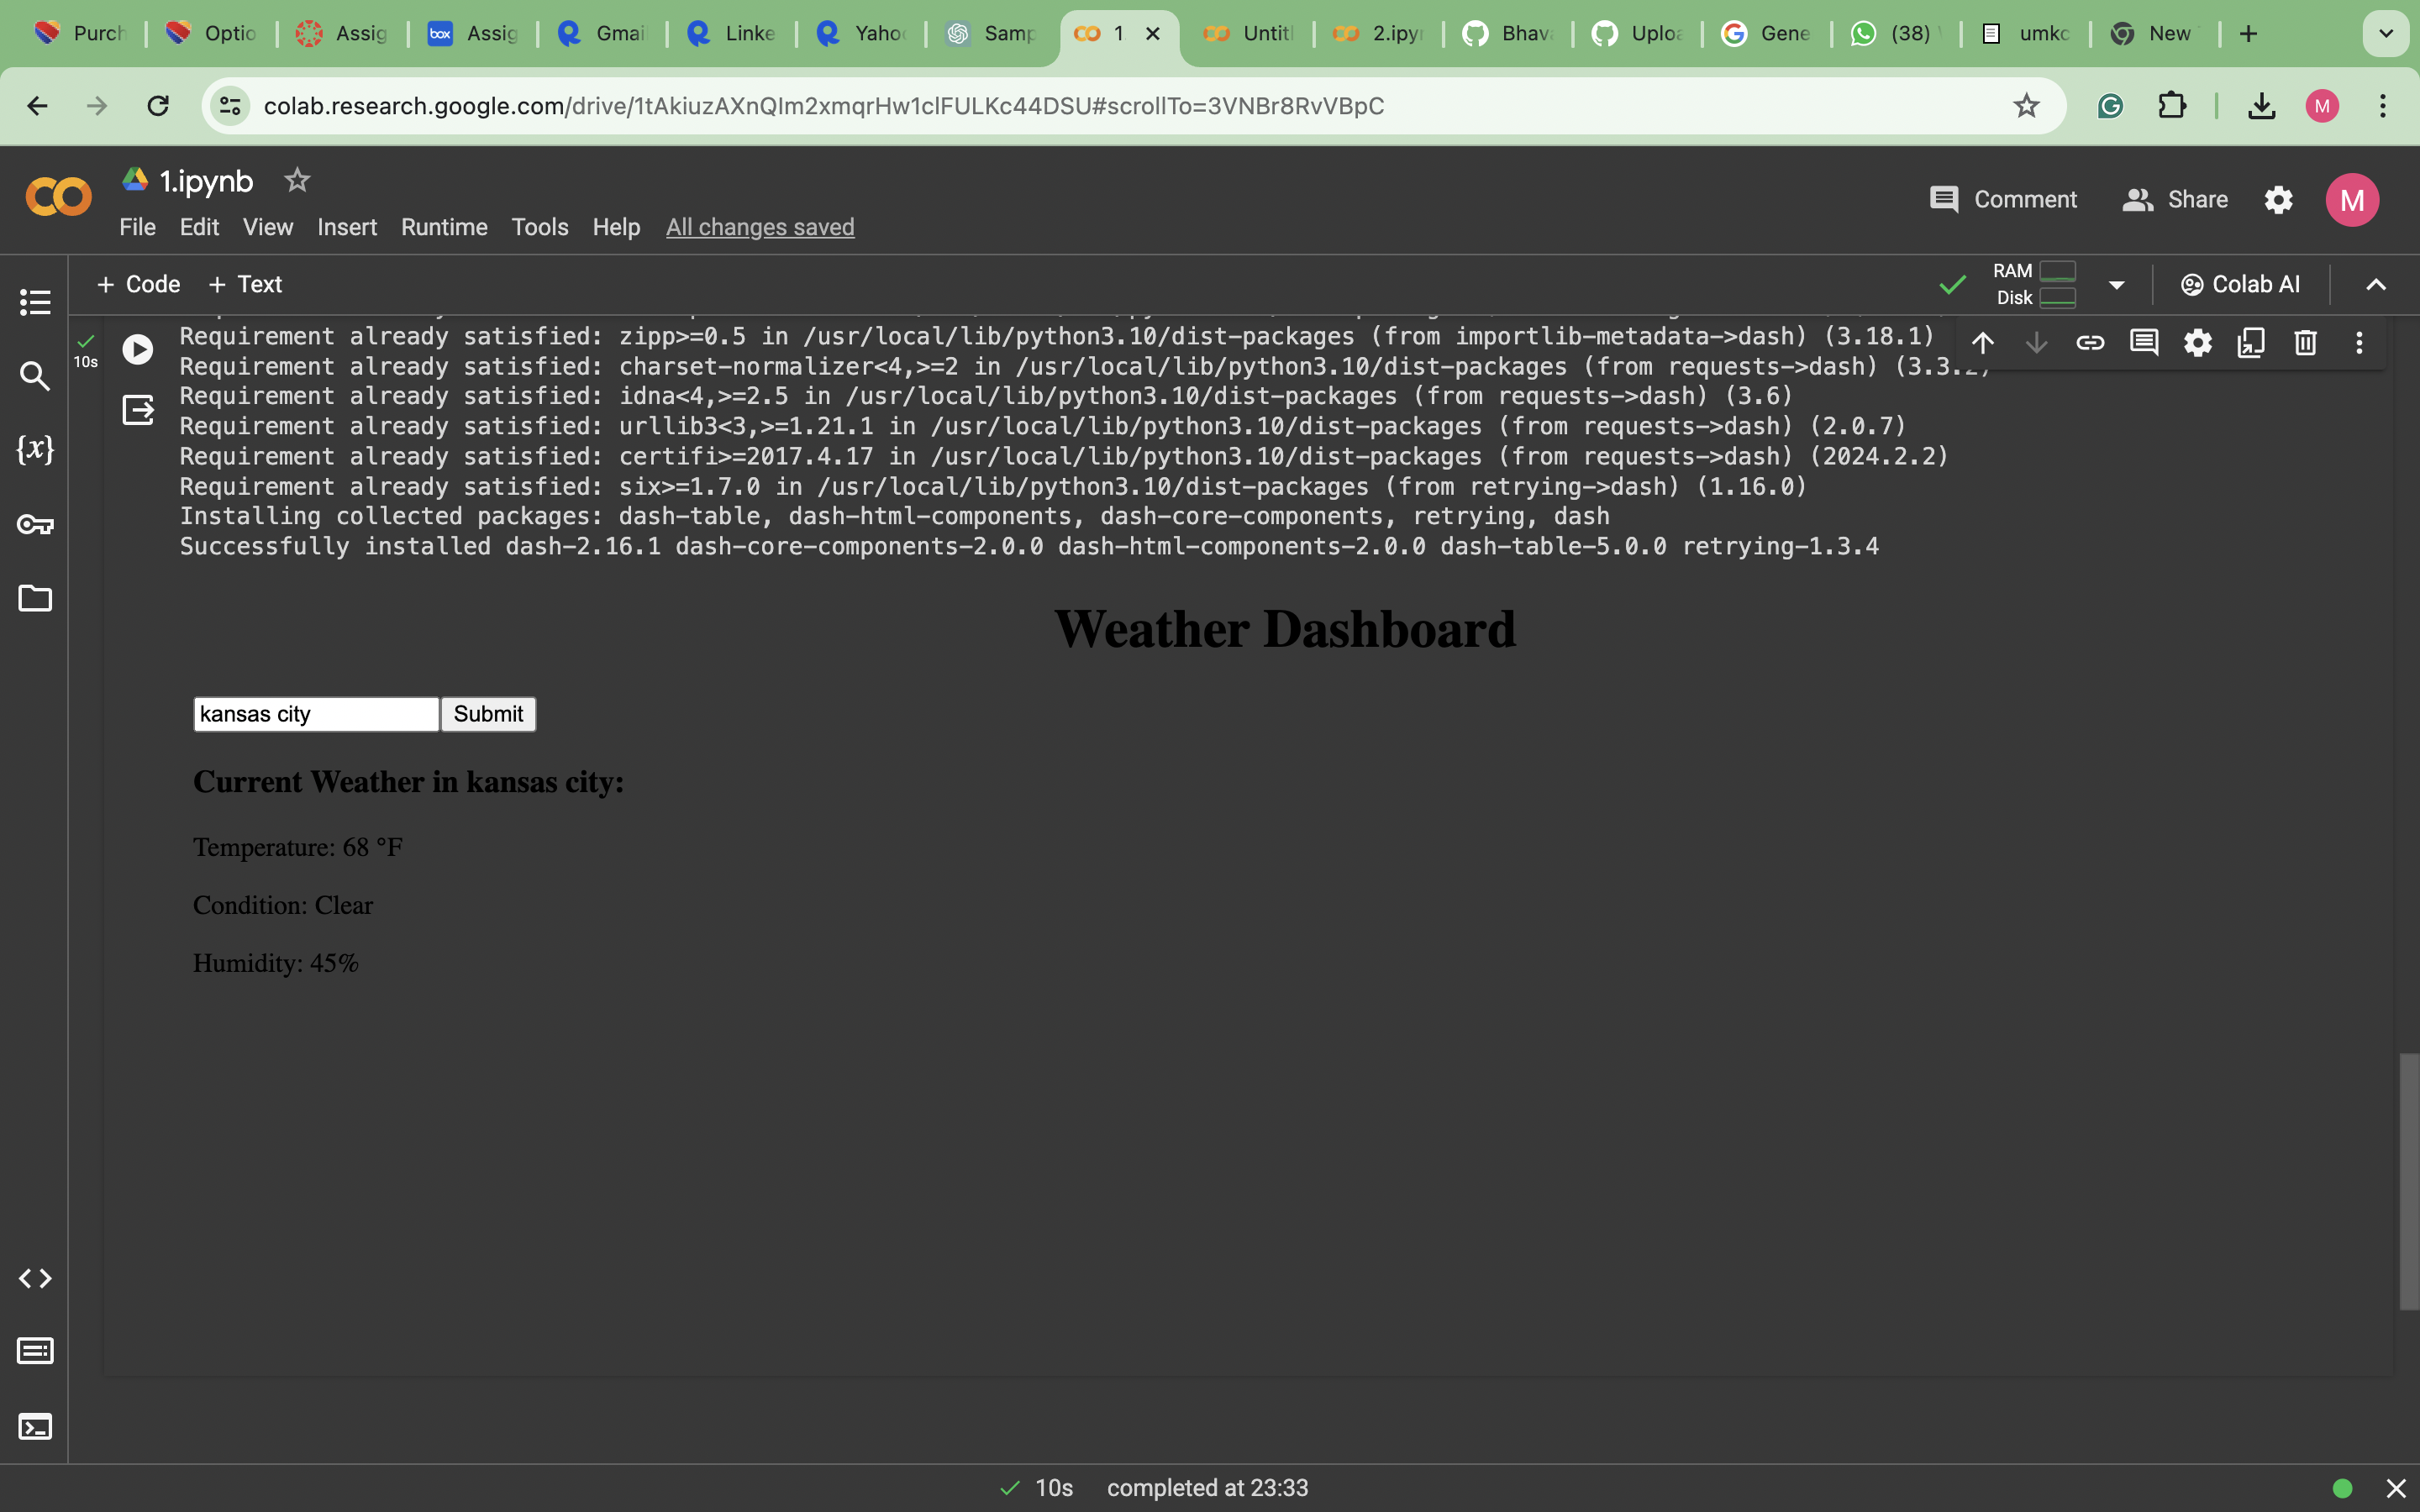

For texas
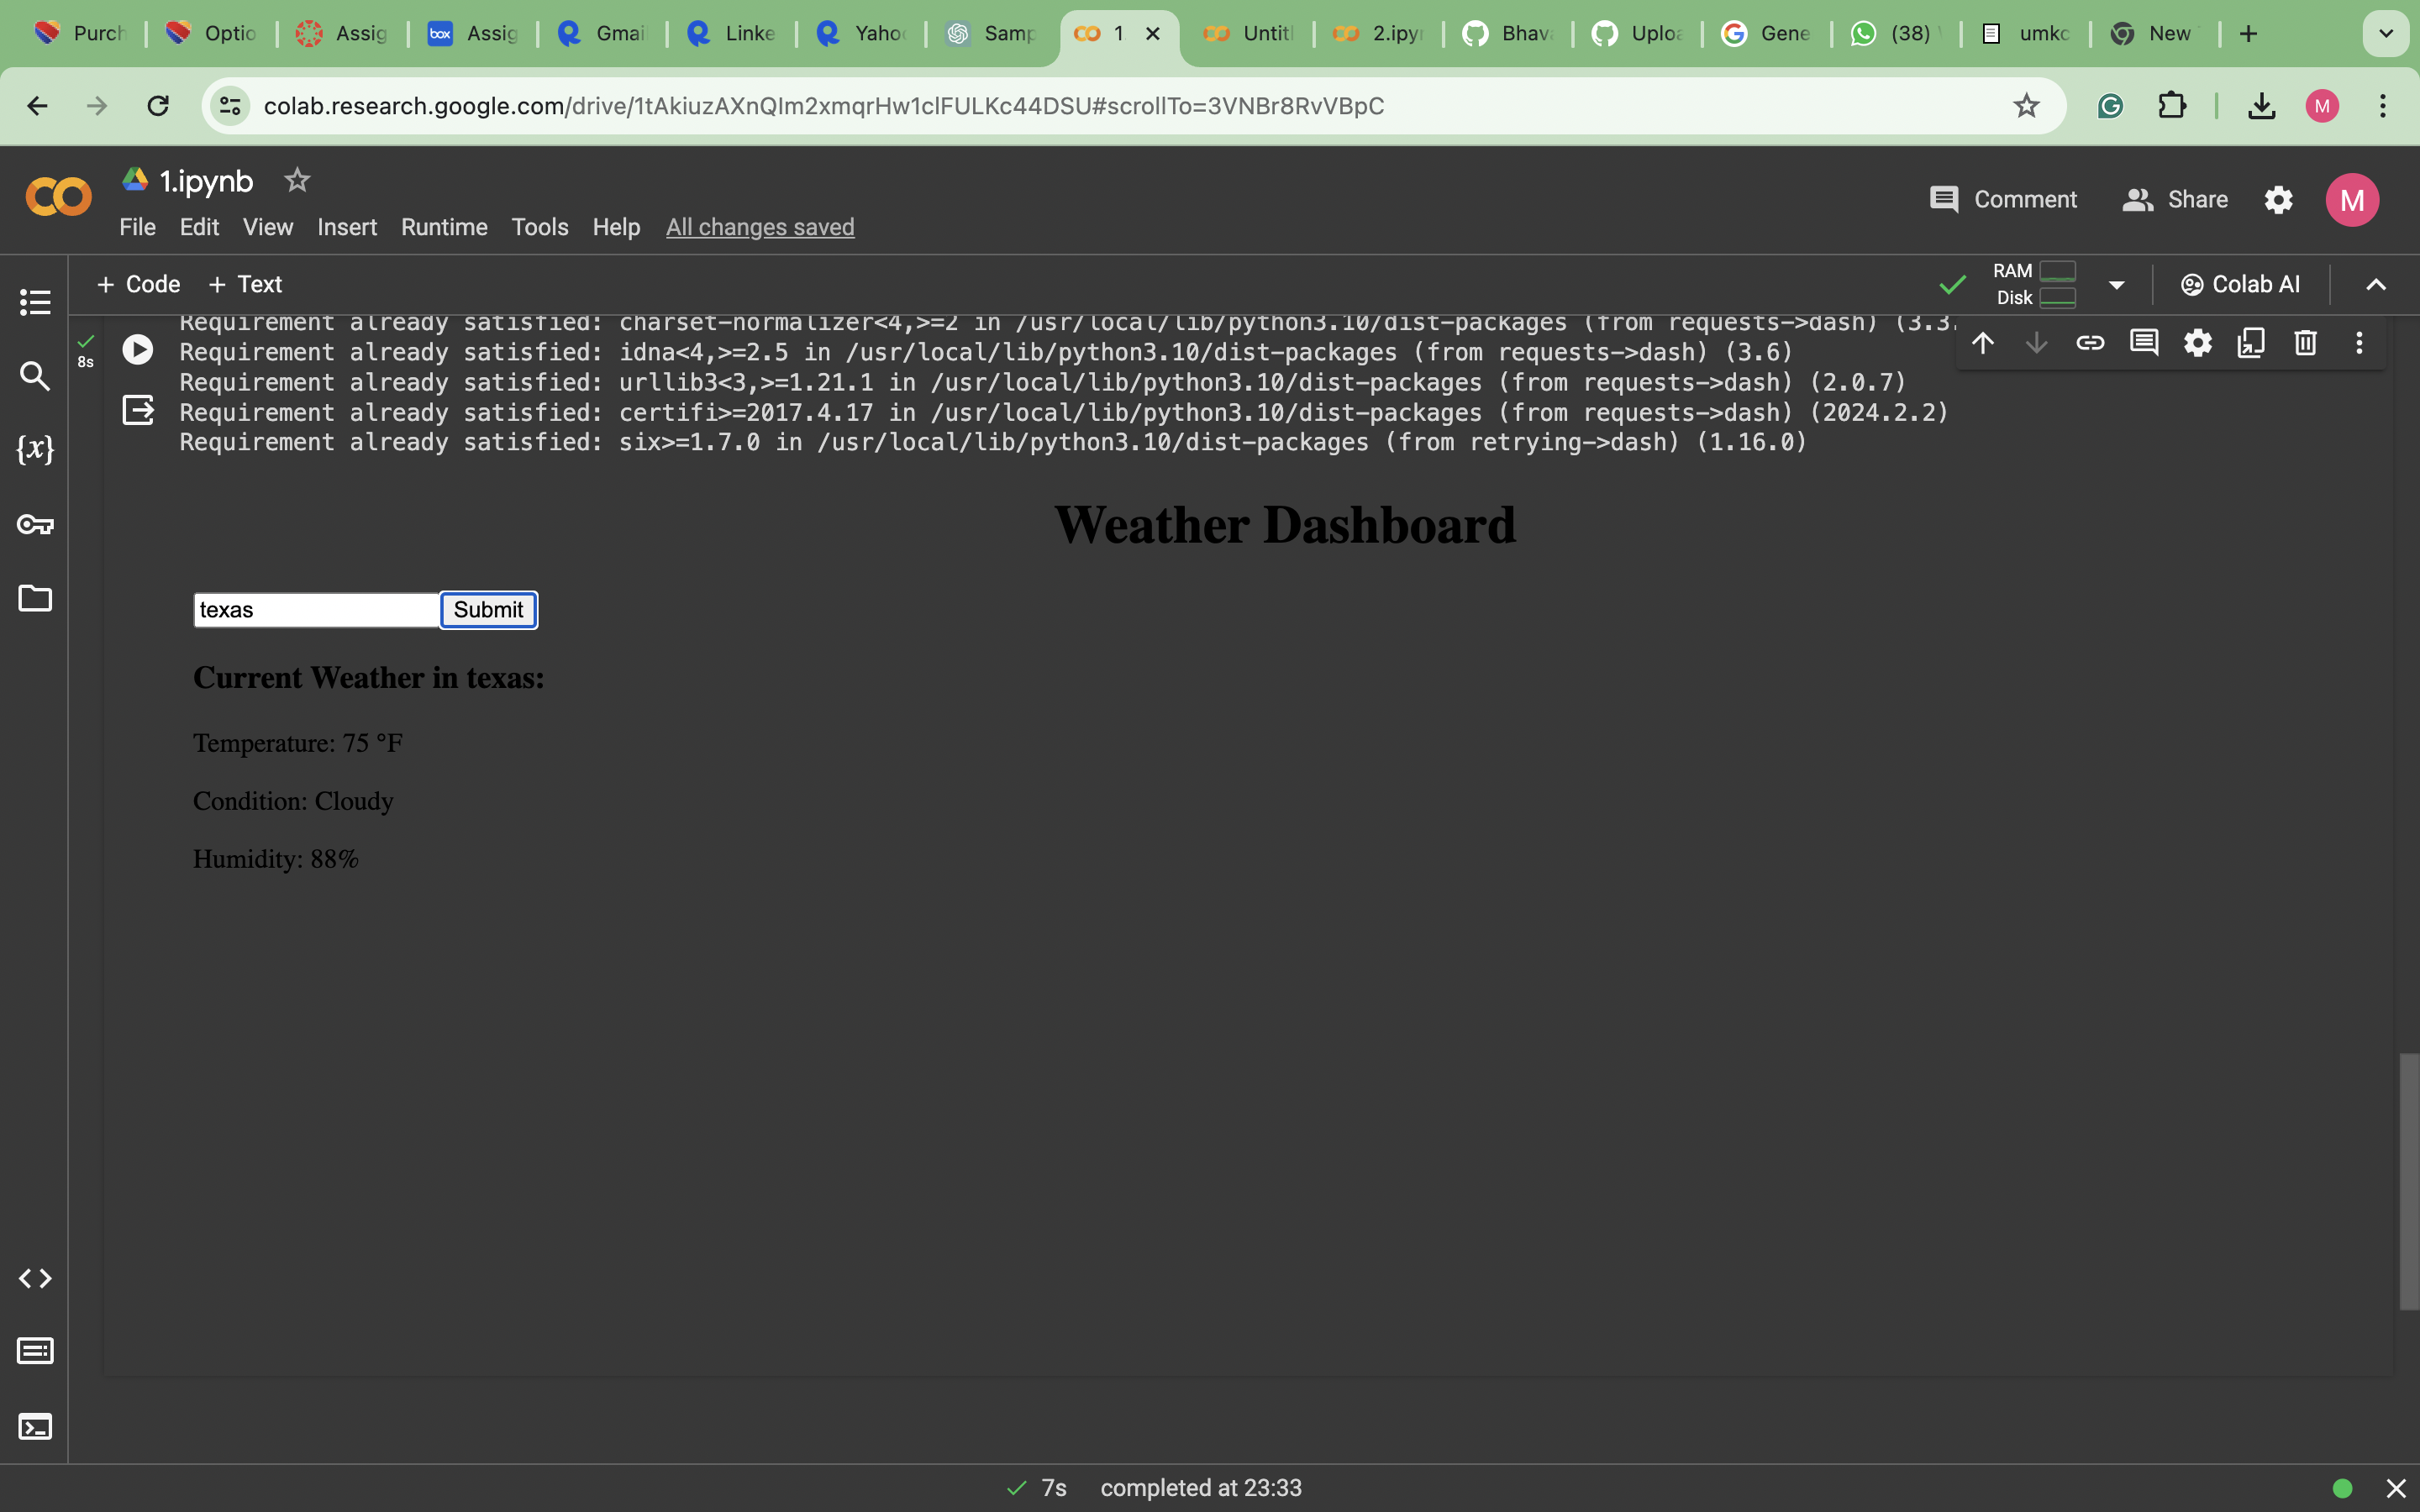

For miami
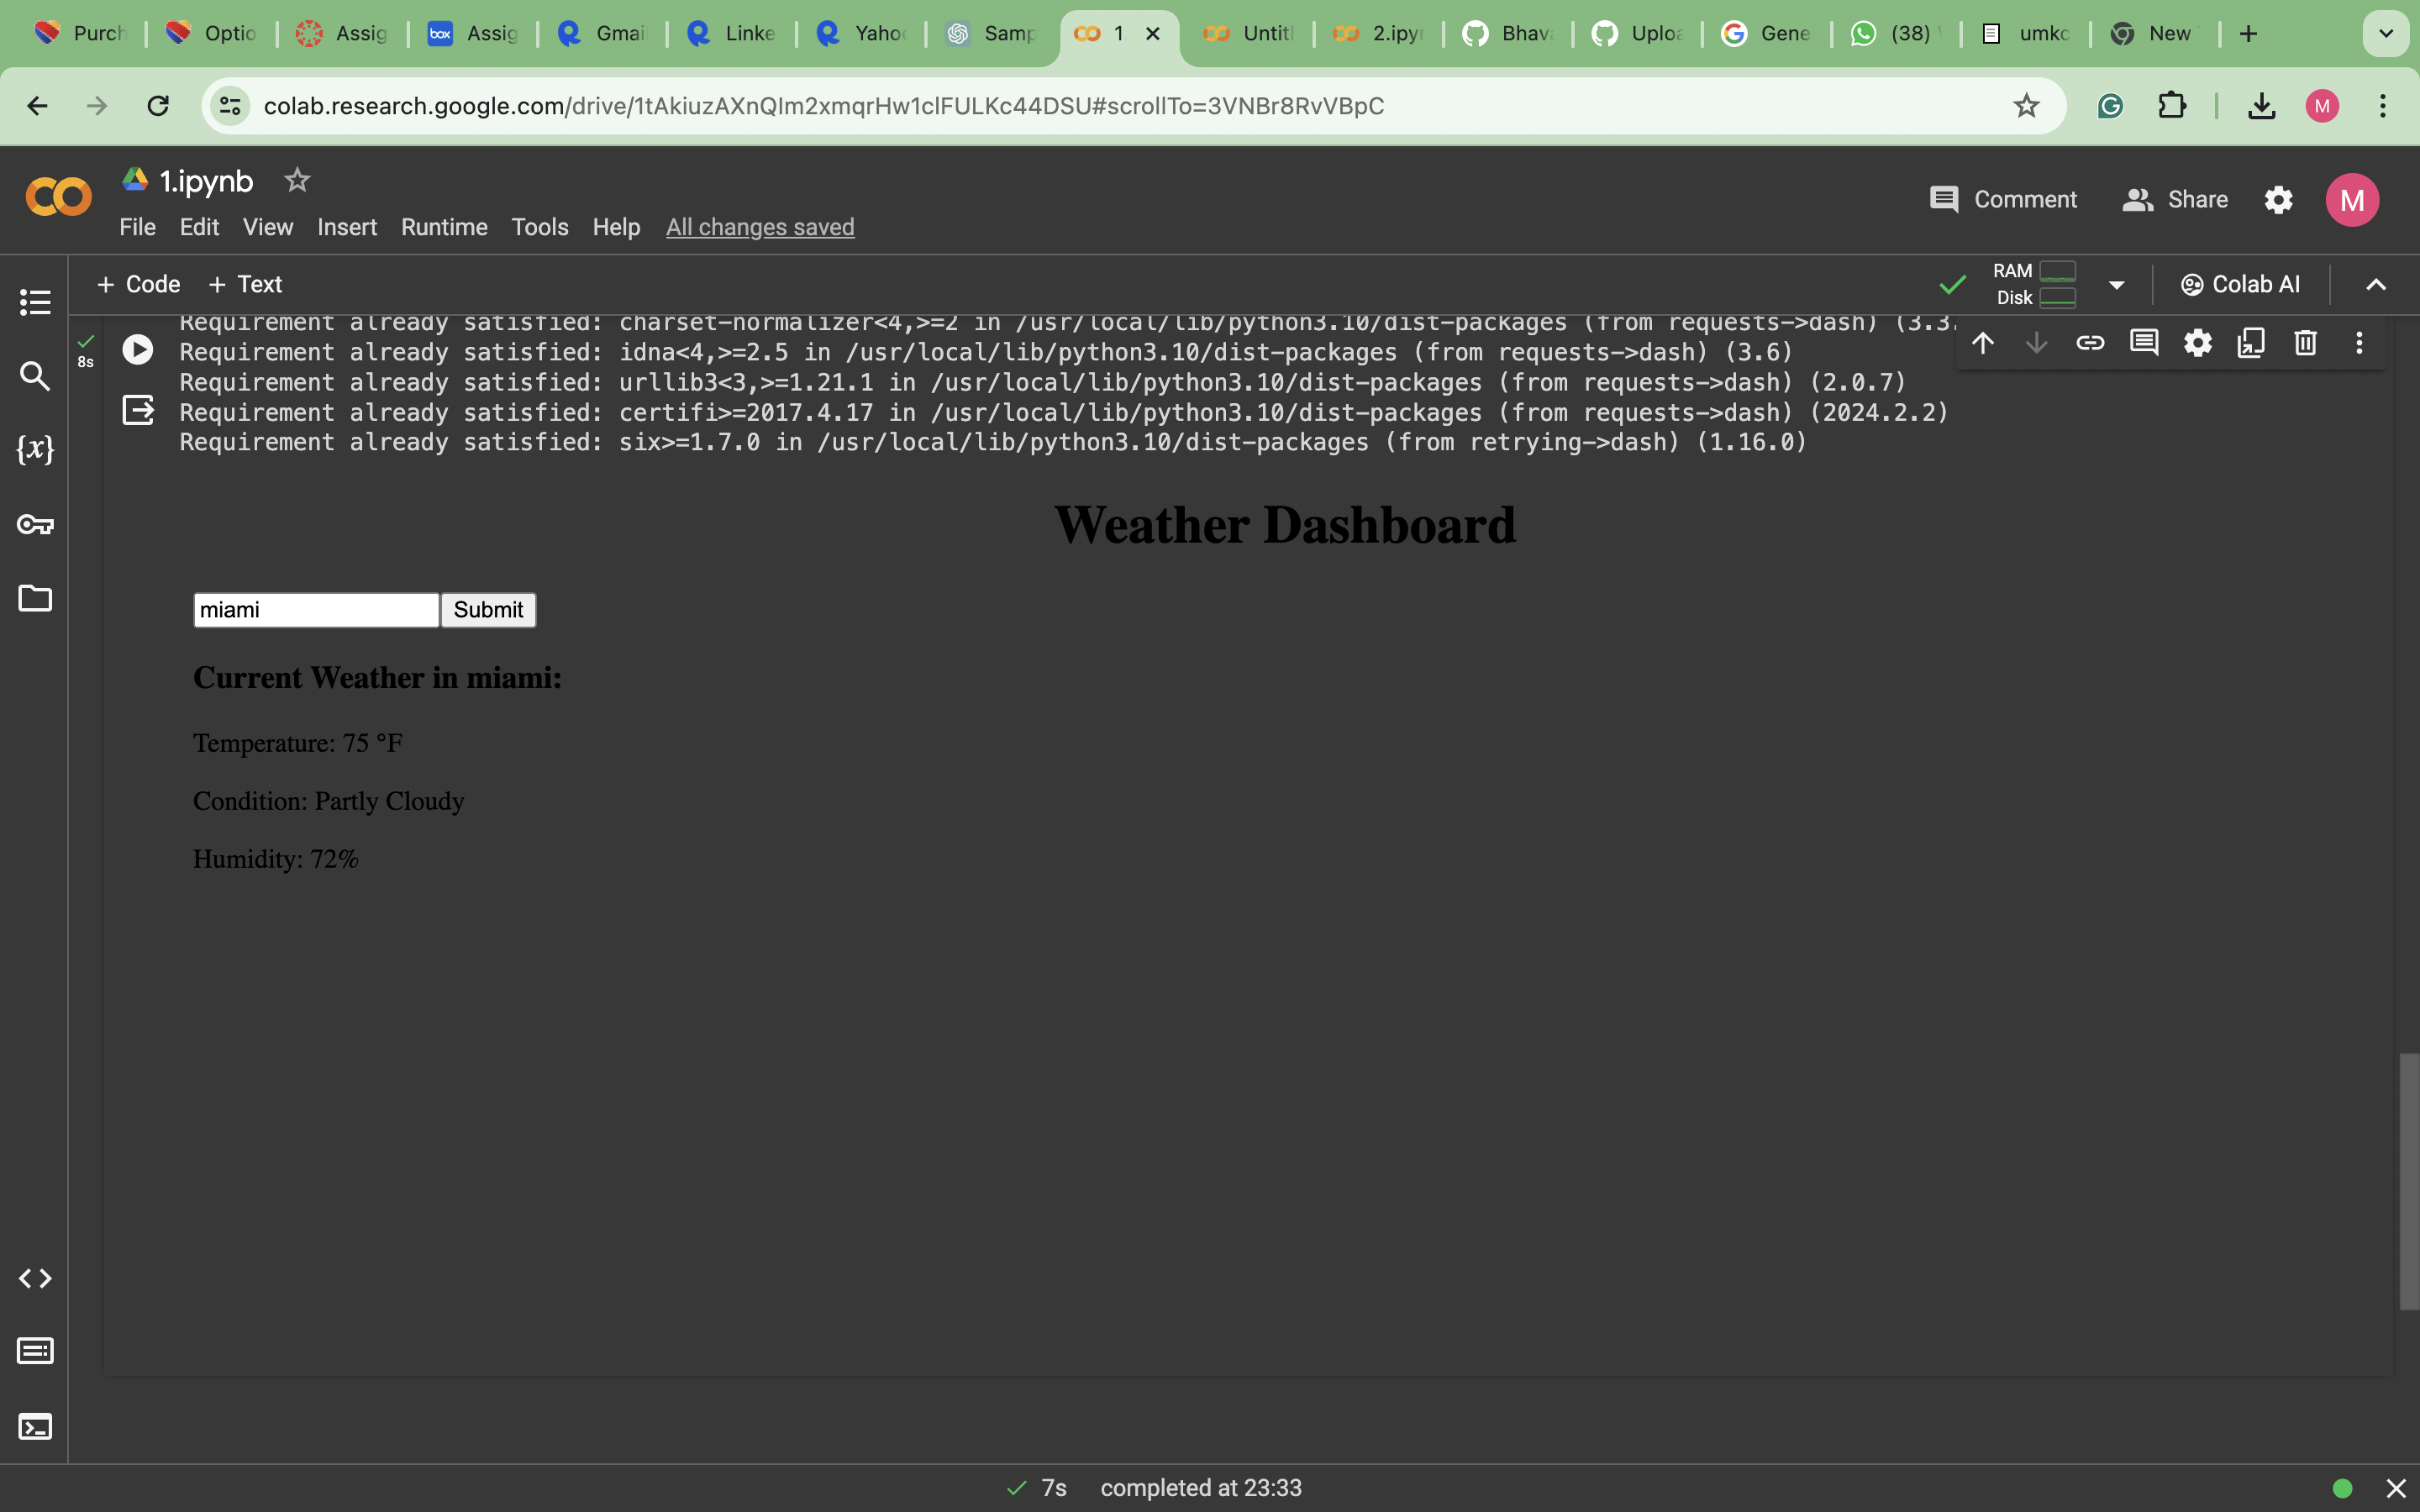